# Exercises for EBT617E - Week 2

## Bloch Theorem

An energy eigenstate in a periodic potential can be written as 

$$ \Psi_k(z) = \mathrm{e}^{ikz} u_k(z) $$

Since the potential $V(z)$ and the $u_k(z)$ functions are periodic in $z$ with period $a$, they can be written as a Fourier series

$$ V(z) = V(z+a) = \sum_n V_n \mathrm{e}^{i2\pi n z /a} = \sum_n V_n \mathrm{e}^{iG_n z} \qquad \mathrm{and} \qquad  u_k(z) = \sum_n u_{k,n} \mathrm{e}^{iG_n z} $$

where $G_n = \frac{2\pi}{a} n$ are the reciprocal lattice vectors. Since any $k' = (k+G_n)$ with $k \in [-\pi/a,\pi/a)$ in the BZ, we can label the states with the indices $(k,n)$.

The Schrödinger equation 

$$ \left[ \frac{\hbar^2 \mathrm{d}^2}{2m \mathrm{d}z^2} + V(z) \right] \Psi_k(z) = E_k \Psi_k(z) $$

can be written in Fourier space as 

$$ \epsilon_{k+G_n} u_{k,n}  + \sum_m V_m u_{k,n-m} = E_k u_{k,n} $$

where $\epsilon_{k+G_n} = \frac{\hbar^2 (k+G_n)^2}{2m}$. For example, for a potential with only $V_{\pm 1}$ nonvanishing, we have a tridiagonal band matrix of the following form:

\begin{equation}
    \begin{pmatrix} \ddots &                 &                        &                   &                     &   & & \\
                    \ddots & \ddots          &   \ddots               &                   &                     &   & &  \\
                           & V_{-1}          &  \epsilon_{k,G_{-1}}   &  V_1              &                     &   & &\\
                           &                 &    V_{-1}              &  \epsilon_{k,G_0} &  V_1                &   & &  \\
                           &                 &                        &  V_{-1}           & \epsilon_{k,G_1}    & V_1 & &\\
                           & & & &\ddots &\ddots &\ddots &  \\
                           & & & & & &\ddots &
                                                \end{pmatrix}  
                    \begin{pmatrix} \vdots \\ \vdots \\ u_1 \\ u_0 \\ u_{\textit{-}1} \\ \vdots \\ \vdots \end{pmatrix}
                    =
                   E_k \begin{pmatrix} \vdots \\ \vdots \\ u_1 \\ u_0 \\ u_{\textit{-}1} \\ \vdots \\ \vdots \end{pmatrix} 
\end{equation}


Scaling:

$$ z' = z / a, \qquad k' = ka, \qquad E' = E / (\hbar^2/2ma^2) $$

so that $k \in [-\pi,\pi)$.

In [23]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [53]:
# k in [-pi,pi]
def ϵkG(k,n):
    G = 2*np.pi*n
    return (G+k)**2

In [130]:
# number of bands is 2*nmax+1
nmax = 5
dB = 2*nmax+1

# number of points in the Brillouin zone
Nk = 2**12

kk, dk = np.linspace(-np.pi,np.pi,Nk,endpoint=True,retstep=True)

Potential 

$$ V(x) = V_\mathrm{max} \cos (2 \pi x/a) $$

In [131]:
Vmax = 1

dF = 1
FCoeffs = np.zeros(2*dF+1)
FCoeffs[0] = -Vmax/2 
FCoeffs[1] = 0
FCoeffs[2] = -Vmax/2

In [132]:
# real-Fourier space transform

# real space mesh
Nz = 101
zmax = 0.5
zz = np.linspace(-zmax,zmax,Nz,endpoint=True)

nn = np.arange(-dF,dF+1)

expqnz= np.exp(1j*2*np.pi*np.outer(zz,nn))

Text(0.5, 0, 'V(z)')

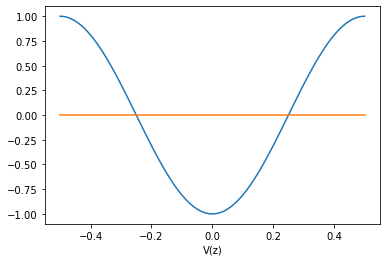

In [133]:
# plot the periodic potential using Fourier coefficients
Vz = expqnz@FCoeffs
plt.plot(zz,Vz.real)
plt.plot(zz,Vz.imag)
plt.xlabel("z/a")
plt.xlabel("V(z)")

In [134]:
def FMat(FCoeffs, nmax):
    dB = 2*nmax+1
    MM = np.zeros([dB,dB])
    dM = len(FCoeffs)//2+1
    for iFc,Fc in enumerate(FCoeffs):
        MM+=np.diag([Fc]*(dB-np.abs(-dM+iFc+1)),-dM+iFc+1)
    return MM # +MM.T

def Hband(nmax,k,VFMat):
    nn = np.arange(-nmax,nmax+1)
    HH = np.diag(ϵkG(k,nn))
    HH+= VFMat
    return HH

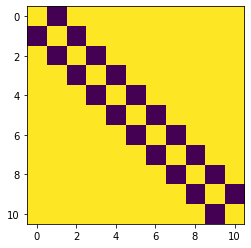

In [135]:
plt.imshow(FMat(FCoeffs, nmax))

In [136]:
k=0
VFMat = FMat(FCoeffs, nmax)
Hb    = Hband(nmax,k,VFMat)

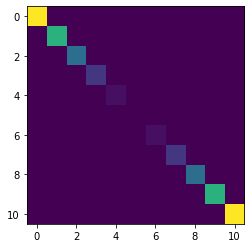

In [137]:
plt.imshow(Hb)

In [138]:
Ebands=[]
for k in kk:
    Hb = Hband(nmax,k,VFMat)
    ee, uu = np.linalg.eigh(Hb)
    Ebands.append(ee)
    
Ebands=np.array(Ebands)

In [148]:
np.histogram?

Signature:
np.histogram(
    a,
    bins=10,
    range=None,
    normed=None,
    weights=None,
    density=None,
)
Docstring:
Compute the histogram of a set of data.

Parameters
----------
a : array_like
    Input data. The histogram is computed over the flattened array.
bins : int or sequence of scalars or str, optional
    If `bins` is an int, it defines the number of equal-width
    bins in the given range (10, by default). If `bins` is a
    sequence, it defines a monotonically increasing array of bin edges,
    including the rightmost edge, allowing for non-uniform bin widths.

    .. versionadded:: 1.11.0

    If `bins` is a string, it defines the method used to calculate the
    optimal bin width, as defined by `histogram_bin_edges`.

range : (float, float), optional
    The lower and upper range of the bins.  If not provided, range
    is simply ``(a.min(), a.max())``.  Values outside the range are
    ignored. The first element of the range must be less than or
    equal to t

ΔE = 1.0, |2V_G| = 1.0


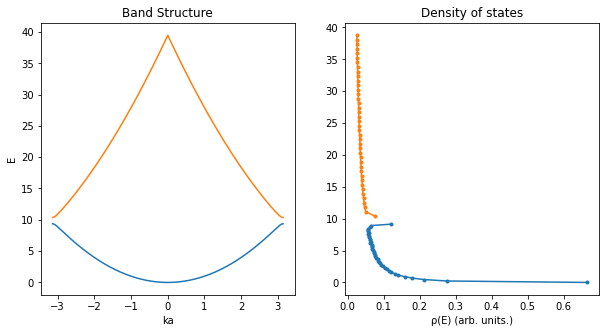

In [159]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

Nbands=2
# plot the first two bands
for ni,n in enumerate(nn[:Nbands]):
    ax[0].plot(kk,Ebands[:,ni],'-')
    ρE, Ea = np.histogram(Ebands[:,ni], bins=41, density=True)
    ax[1].plot(ρE,Ea[:-1],'.-')
# energy gap between 1st and 2nd band
# plt.axhline(y=Ebands[-1,0], ls='--', color="gray")
# plt.axhline(y=Ebands[-1,1], ls='--', color="gray")

print(f'ΔE = {Ebands[0,1] - Ebands[0,0]:.3}, |2V_G| = {2*abs(FCoeffs[-1]):3}')

#plt.ylim([Ebands[0,0]*.8,Ebands[0,1]*1.2])
ax[0].set_ylabel("E")
ax[0].set_xlabel("ka")
ax[0].set_title("Band Structure")
ax[1].set_xlabel("ρ(E) (arb. units.)")
ax[1].set_title("Density of states");

In [143]:
# real-Fourier space transform
nn = np.arange(-nmax,nmax+1)

# create the transformation matrix for the z-mesh
expqnz= np.exp(1j*2*np.pi*np.outer(zz,nn))

Text(0, 0.5, 'u(z)')

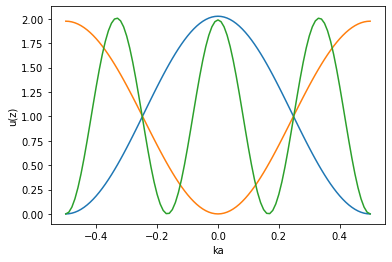

In [145]:
# plot the real space wave function for an eigenstate

for iz in range(3):
    uz = expqnz@uu[:,iz]
    plt.plot(zz,np.abs(uz)**2)
plt.xlabel("ka")
plt.ylabel("u(z)")